<h1><center>Assignment - Advanced Regression on HousingPrice<center></h1>
    <h4><center>By : Sai Manish Akula</center></h4>

### Problem Statement 

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company is looking at prospective properties to buy to enter the market. 

Hence company wants to know 
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.


### Business Goal 

Is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Steps involed in building the model:
1) Reading and Understanding the Data
2) Data Cleaning
3) Data Visualization
4) Data Preparation
5) Recursive feature elimination (RFE)
6) Model Building and Evaluation

<h1><center> Step 1: Reading and Understanding the Data</center></h1>


In [1]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
housingPrice = pd.read_csv('train.csv', encoding = 'latin')
housingPrice.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# check various columns of the housing dataframe
housingPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housingPrice.shape

(1460, 81)

In [5]:
housingPrice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housingPrice.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

<h2><center>Step 2: Data Cleaning </center></h2>

#### 2.1 Imputing missing values for Categorical attributes

In [7]:
# check for null values for object data type which is categorical variables

housingPrice.select_dtypes(include='object').isnull().sum()[housingPrice.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Replace NA with None

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'):
    
    housingPrice[col]=housingPrice[col].fillna('None')

#### 2.2 Remove categorical attributes that have more than 85% data 

In [9]:
# To get the column names that have count of one value more than 85% data

def getHighCatValueCounts():
    column = []
    categorical_columns = housingPrice.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingPrice[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCatValueCounts()

# Remove the columns with skewed data

housingPrice.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingPrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [10]:
# once again check for null values in all categorical columns

housingPrice.select_dtypes(include='object').isnull().sum()[housingPrice.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

As we can see there are no more null values

#### 2.3 Removing null values in Numerical attributes - Imputing with median

In [11]:
# check for the null values in the numerical data

housingPrice.select_dtypes(include=['int64','float']).isnull().sum()[housingPrice.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [12]:
# For numerical data we go ahead and impute the null values with median values for LotFrontage and MasVnrArea columns

housingPrice['LotFrontage'] = housingPrice['LotFrontage'].replace(np.nan, housingPrice['LotFrontage'].median())
housingPrice['MasVnrArea'] = housingPrice['MasVnrArea'].replace(np.nan, housingPrice['MasVnrArea'].median())

In [13]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

housingPrice['GarageYrBlt'] = housingPrice['GarageYrBlt'].fillna(0)
housingPrice['GarageYrBlt'] = housingPrice['GarageYrBlt'].astype(int)

In [14]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def CheckForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housingPrice['IsRemodelled'] = housingPrice.apply(CheckForRemodel, axis=1)
housingPrice.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [15]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housingPrice['BuiltOrRemodelAge'] = housingPrice.apply(getBuiltOrRemodelAge, axis=1)
housingPrice.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [16]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housingPrice['OldOrNewGarage'] = housingPrice['GarageYrBlt'].apply(getGarageConstructionPeriod)
housingPrice.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [17]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

housingPrice.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#### 2.4 Remove numerical attributes that have more than 85% data associated to one value.
We will remove any column that has one value repeating 1241 times as this column would be skewed to one value

In [18]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housingPrice.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housingPrice[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housingPrice.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingPrice.drop(['MoSold'], axis = 1, inplace = True)

housingPrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [19]:
# check for percentage of null values in each column

percent_missing = round(100*(housingPrice.isnull().sum()/len(housingPrice.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


Hence there are no null values in the dataset

#### 2.5 Check for Duplicates

In [20]:
# Check if there are any duplicate values in the dataset

housingPrice[housingPrice.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


There're no duplicates found

#### 2.6 Outlier Treatment

In [21]:
# Check outliers 

housingPrice.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


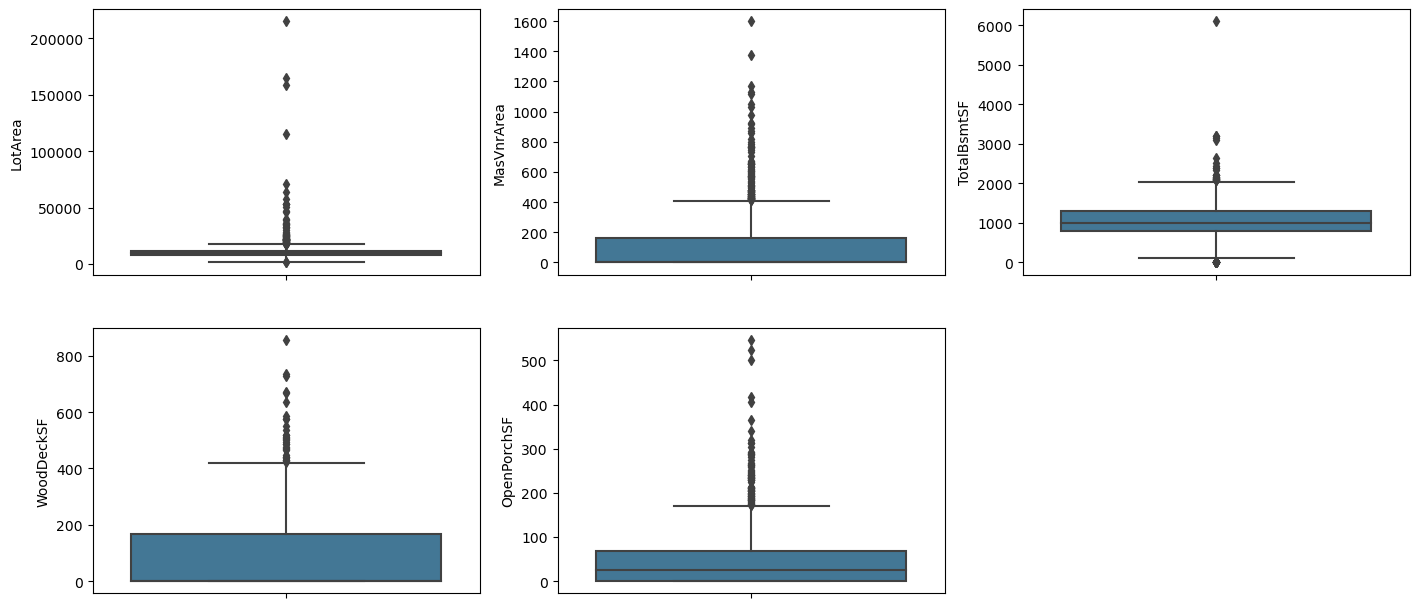

In [22]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='mako',  data = housingPrice)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='mako',  data = housingPrice)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='mako',  data = housingPrice)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='mako',  data = housingPrice)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='mako',  data = housingPrice)
plt.show()

In [23]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housingPrice['LotArea'].quantile(0.98)
housingPrice = housingPrice[housingPrice["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housingPrice['MasVnrArea'].quantile(0.98)
housingPrice = housingPrice[housingPrice["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housingPrice['TotalBsmtSF'].quantile(0.99)
housingPrice = housingPrice[housingPrice["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housingPrice['WoodDeckSF'].quantile(0.99)
housingPrice = housingPrice[housingPrice["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housingPrice['OpenPorchSF'].quantile(0.99)
housingPrice = housingPrice[housingPrice["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [24]:
# Determine the percentage of data retained

num_data = round(100*(len(housingPrice)/1460),2)
print(num_data)

93.01


Implies 7 percent of the data is lost

<h1><center>Step 3: Data Visualization </center></h1>

<Figure size 500x500 with 0 Axes>

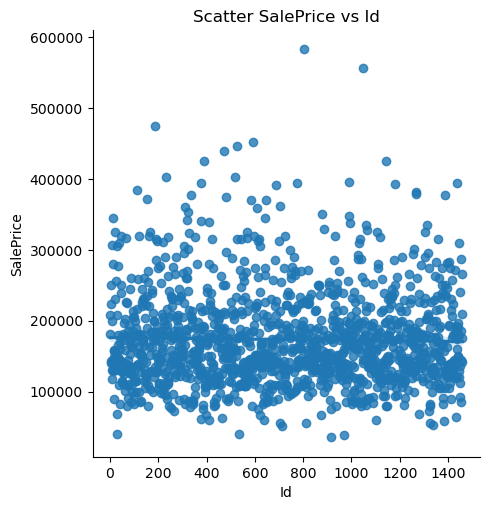

In [25]:
# Visualise the target variable which is SalePrice with Id

plt.figure(figsize=[5,5])
colors = (0,0,0)
area = np.pi*4
sns.lmplot(x='Id', y='SalePrice', data=housingPrice)
plt.title('Scatter SalePrice vs Id')
plt.ylabel('SalePrice')
plt.xlabel('Id')
plt.show()

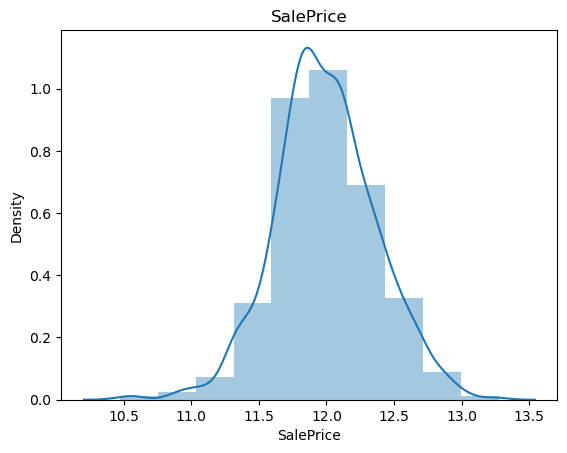

In [26]:
# Now let's Visualise the transformed target variable (SalePrice after transforming the sales price)

housingPrice['SalePrice'] = np.log1p(housingPrice['SalePrice'])

plt.title('SalePrice')
sns.distplot(housingPrice['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with some noise.

<Figure size 500x500 with 0 Axes>

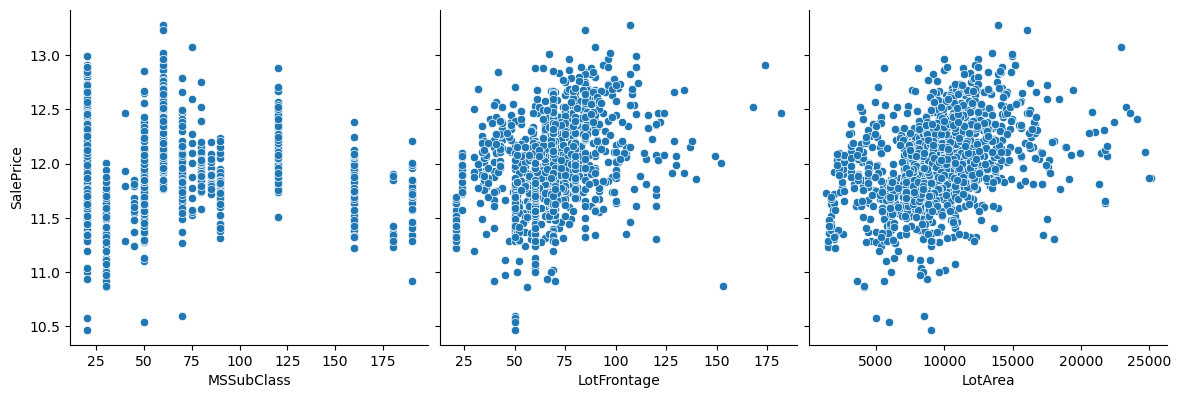

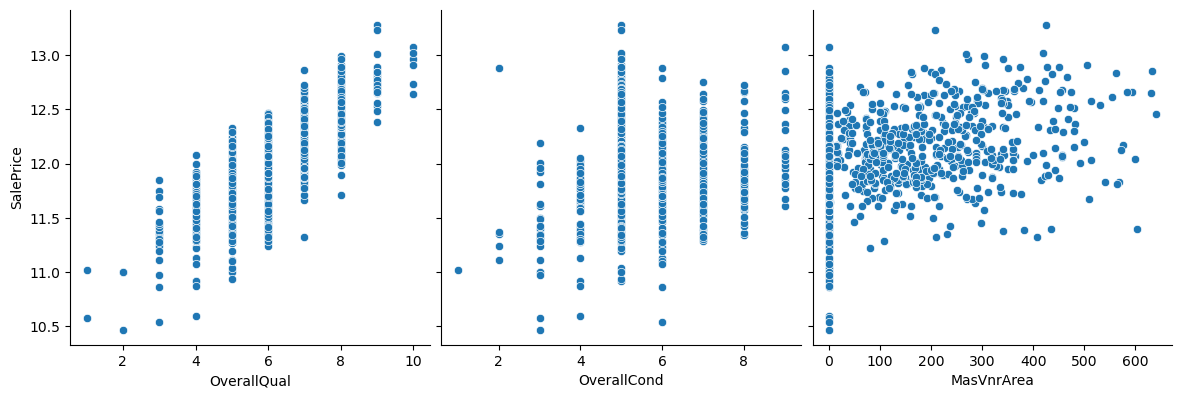

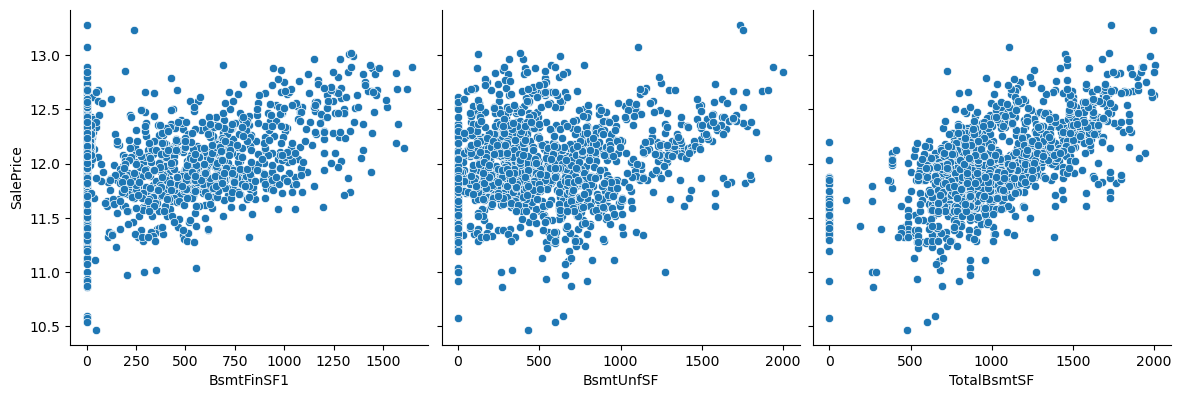

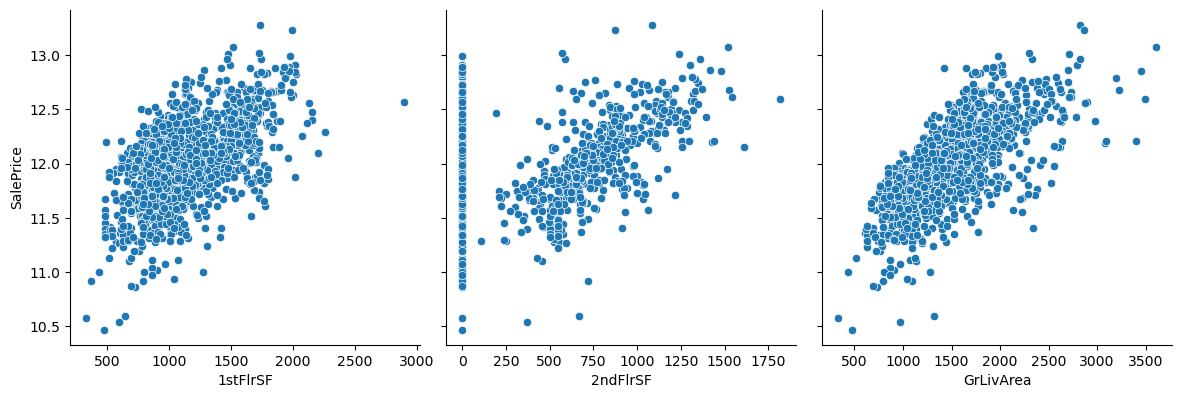

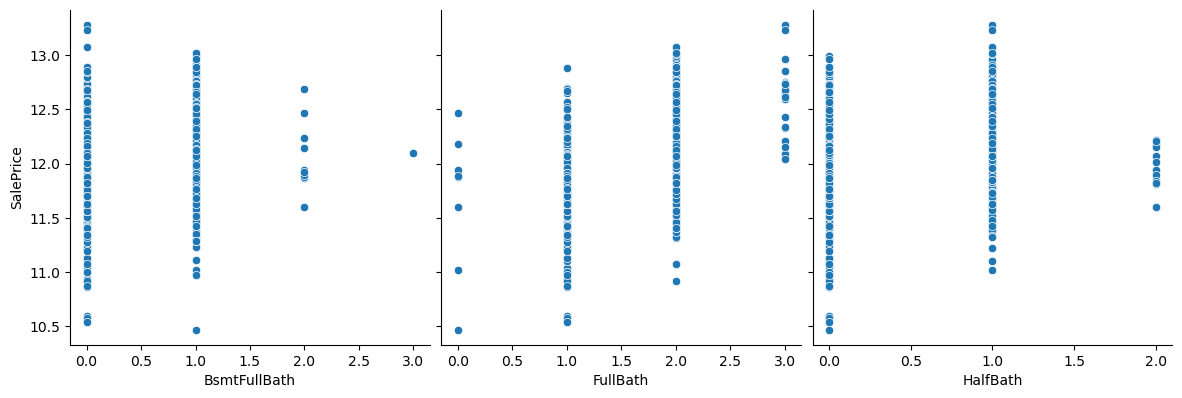

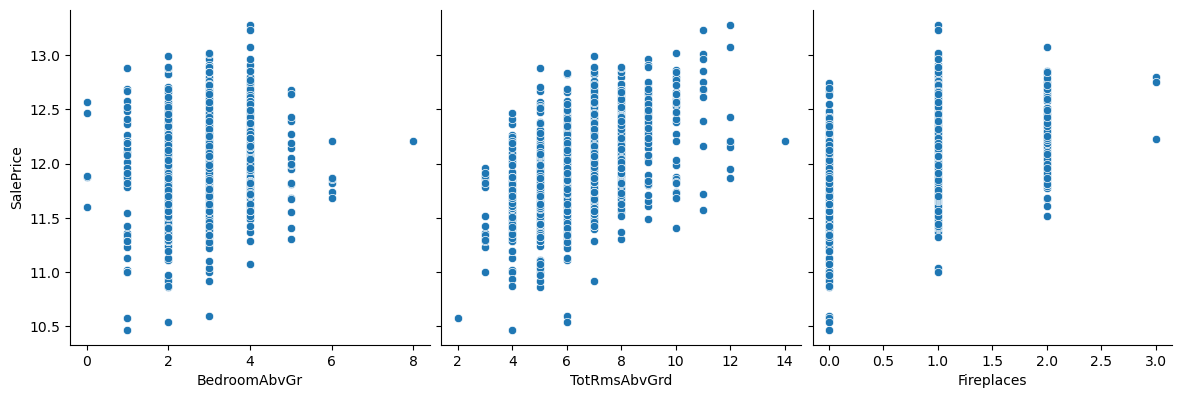

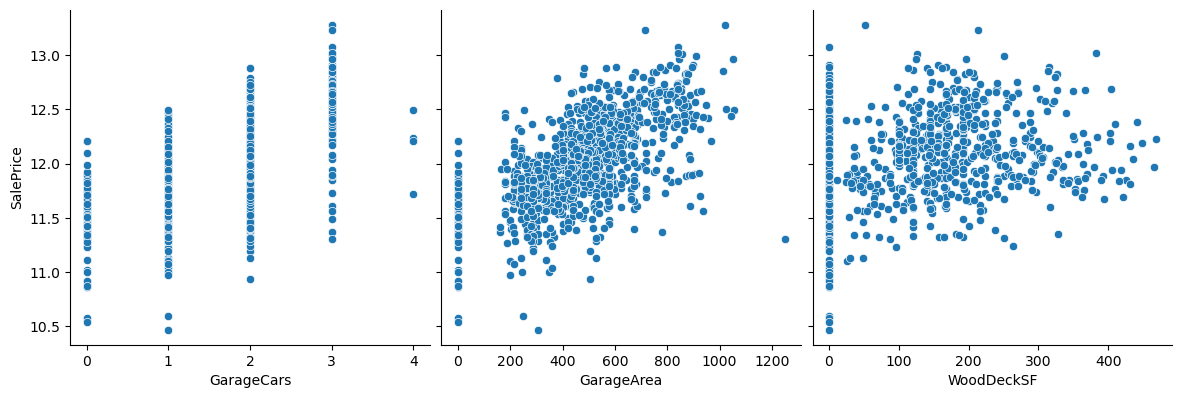

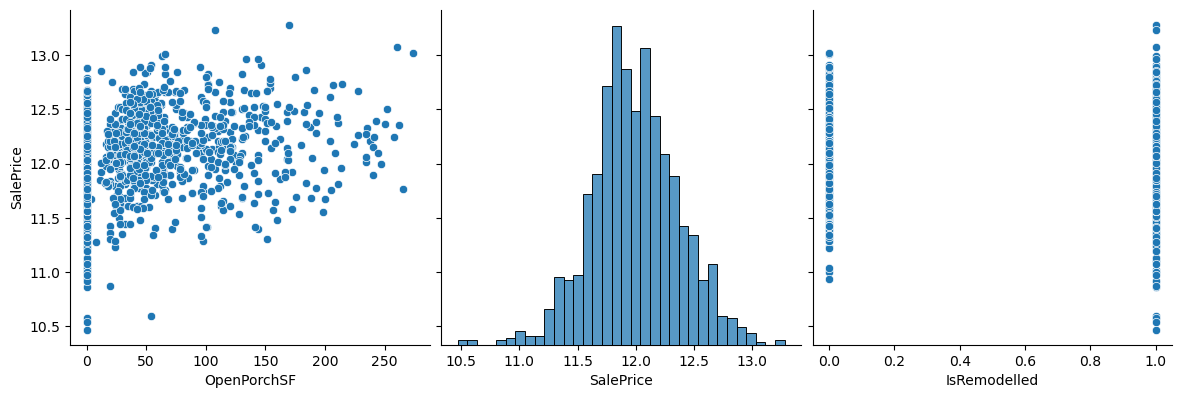

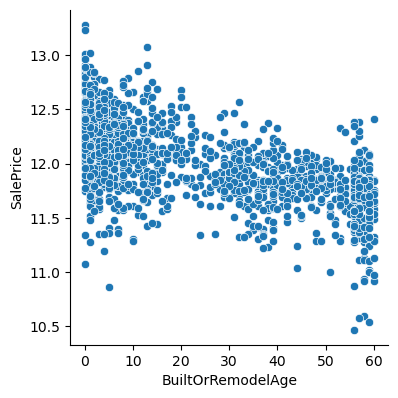

In [27]:
# Check the numerical values using pairplots

plt.figure(figsize=(5,5))
sns.pairplot(housingPrice, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingPrice, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingPrice, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingPrice, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingPrice, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingPrice, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingPrice, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingPrice, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingPrice, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Observations :
    - 1stFlrSF, GrLivArea seems to be showing correlation towards right
    - Rest of the variables are too scattered and hence can be understood during further analysis

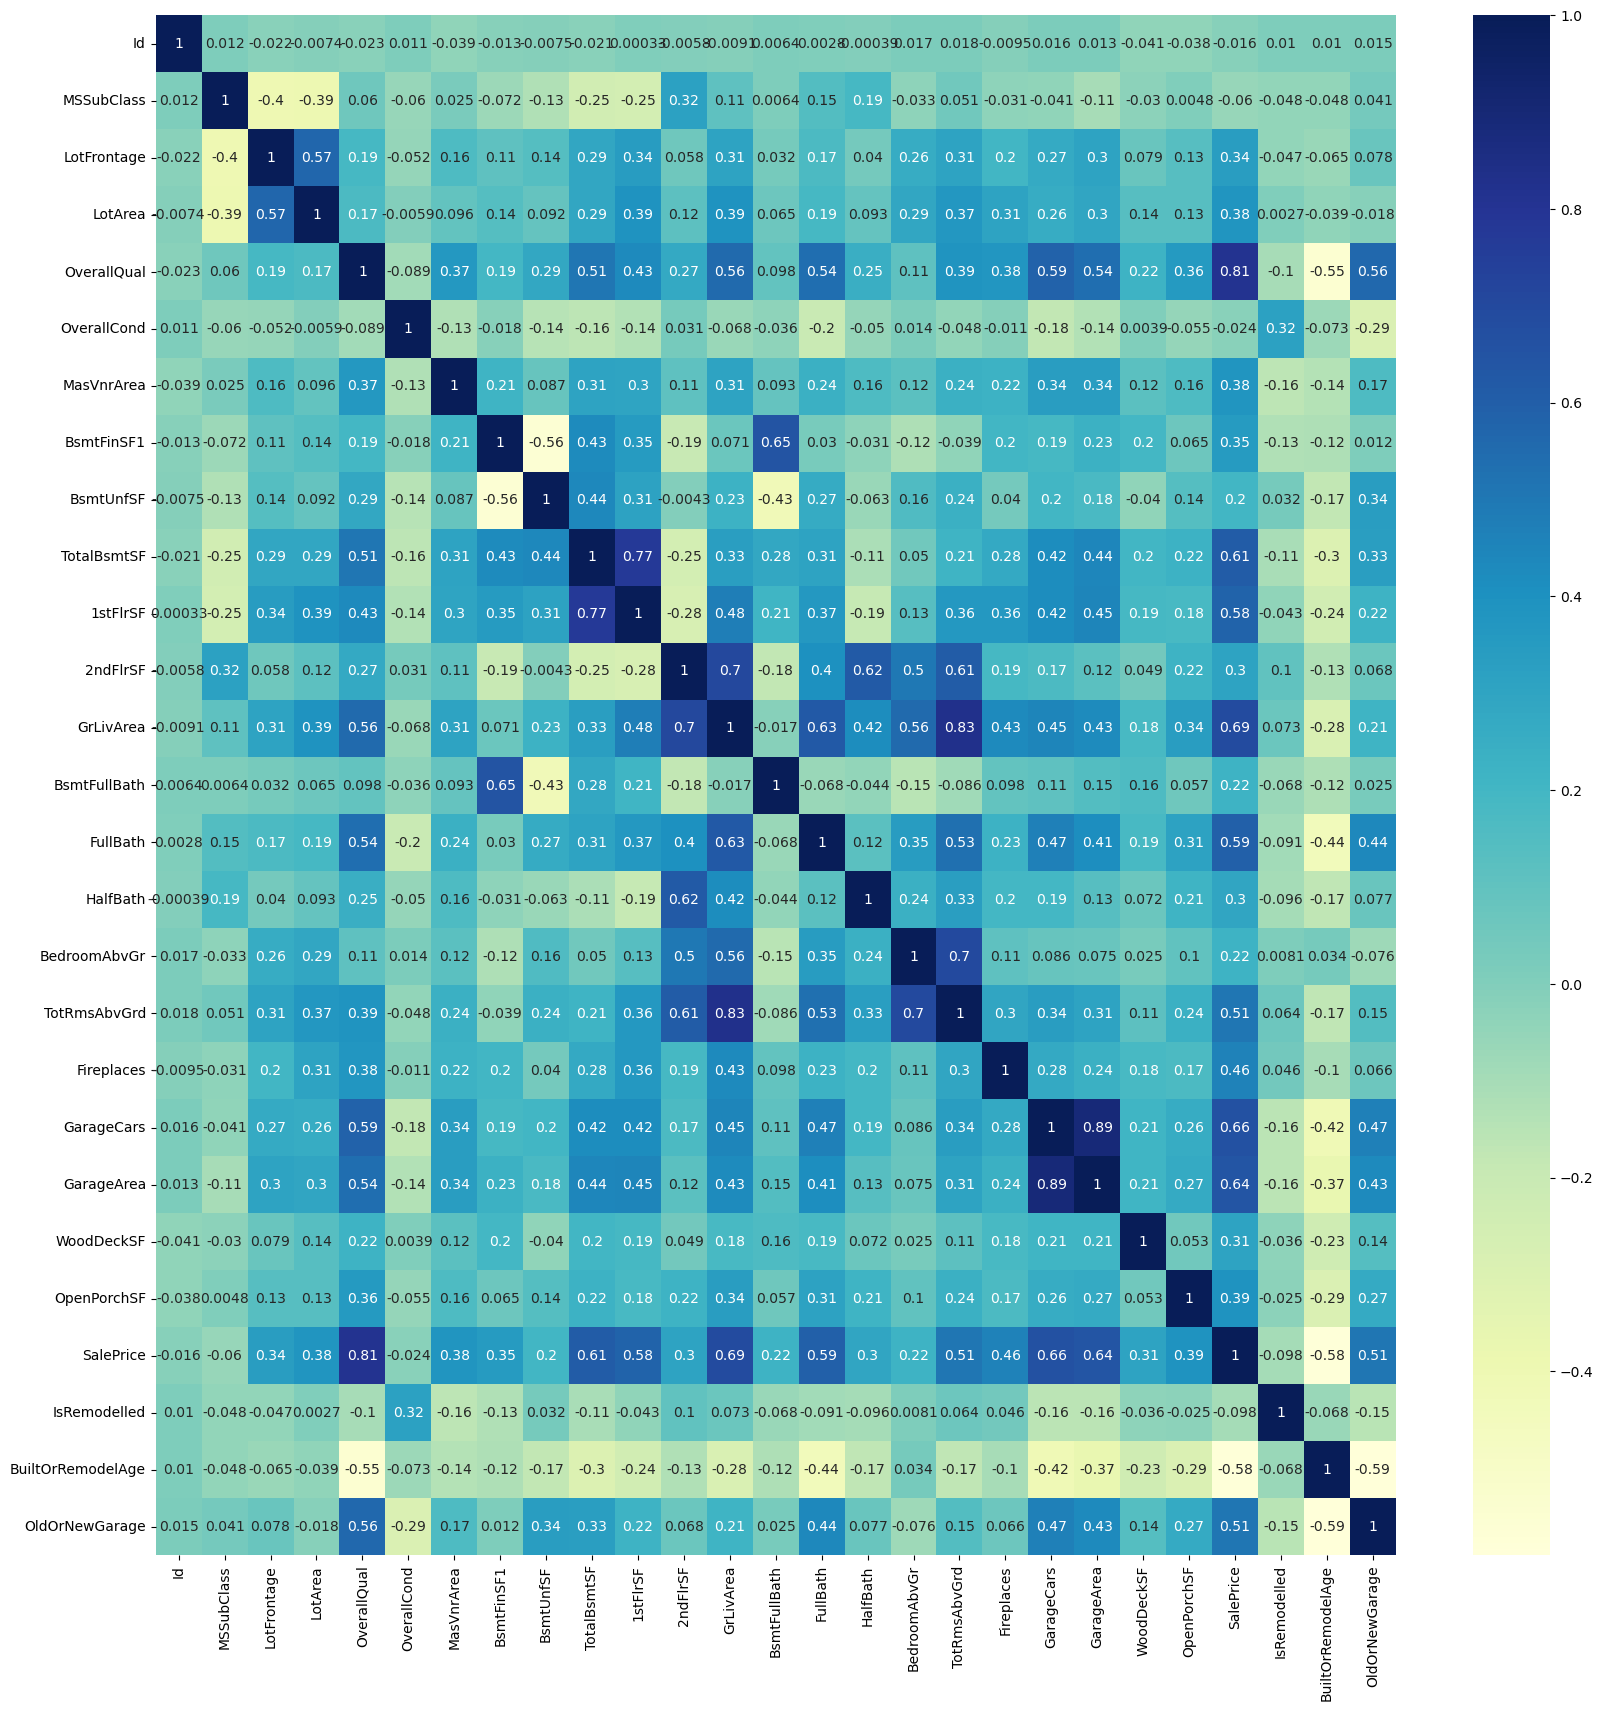

In [28]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 20))
sns.heatmap(housingPrice.corr(),cmap="YlGnBu", annot = True)
plt.show()

#### Removing following columns which shows high correlation

In [29]:
# Removing the highly correlated variables

housingPrice.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [30]:
# Check the shape of the dataframe

housingPrice.shape

(1358, 47)

<h1><center>Step 4: Data Preparation</center></h1>

  - Converting categorical data into numerical data 
  - Creating Dummies

In [31]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

housingPrice['d_LotShape'] = housingPrice['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housingPrice['d_ExterQual'] = housingPrice['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housingPrice['d_BsmtQual'] = housingPrice['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingPrice['d_BsmtExposure'] = housingPrice['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housingPrice['d_BsmtFinType1'] = housingPrice['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housingPrice['d_HeatingQC'] = housingPrice['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingPrice['d_KitchenQual'] = housingPrice['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingPrice['d_FireplaceQu'] = housingPrice['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingPrice['d_GarageFinish'] = housingPrice['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housingPrice['d_BldgType'] = housingPrice['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housingPrice['d_HouseStyle'] = housingPrice['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housingPrice['d_Fence'] = housingPrice['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housingPrice['d_LotConfig'] = housingPrice['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housingPrice['d_MasVnrType'] = housingPrice['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housingPrice['d_SaleCondition'] = housingPrice['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housingPrice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [32]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be useful for us any more

housingPrice = housingPrice.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housingPrice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [33]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housingPrice['MSZoning'], prefix='MSZoning', drop_first = True)
housingPrice = pd.concat([housingPrice, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housingPrice['Neighborhood'], prefix='Neighborhood', drop_first = True)
housingPrice = pd.concat([housingPrice, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housingPrice['RoofStyle'], prefix='RoofStyle', drop_first = True)
housingPrice = pd.concat([housingPrice, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housingPrice['Exterior1st'], prefix='Exterior1st', drop_first = True)
housingPrice = pd.concat([housingPrice, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housingPrice['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housingPrice = pd.concat([housingPrice, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housingPrice['Foundation'], prefix='Foundation', drop_first = True)
housingPrice = pd.concat([housingPrice, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housingPrice['GarageType'], prefix='GarageType', drop_first = True)
housingPrice = pd.concat([housingPrice, d_GarageType], axis = 1)

housingPrice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [34]:
# drop the below columns as we now have new columns derived from these columns

housingPrice = housingPrice.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housingPrice.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [35]:
housingPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


## Train Test Split

In [36]:
# Putting all feature variable to X

X = housingPrice.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [37]:
# Putting response variable to y

y = housingPrice['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scaling the features

In [38]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [39]:
# split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

<h1><center>Step 5: Recursive feature elimination (RFE)</center></h1>

    We will use RFE to get the best 40 features out of all the features and use the new features for further analysis

In [40]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=40)           
rfe = rfe.fit(X_train, y_train)

In [41]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,BsmtUnfSF,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,GarageCars,True,1
8,IsRemodelled,True,1
9,BuiltOrRemodelAge,True,1


In [42]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [43]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Step 6: Model Building and Evaluation

#### Ridge

In [44]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.075145,-0.079308,1
1,0.001,-0.075145,-0.079308,2
2,0.01,-0.075145,-0.079308,3
3,0.1,-0.075146,-0.079310,4
4,0.2,-0.075148,-0.079313,5
5,0.3,-0.075149,-0.079315,6
6,0.4,-0.075152,-0.079318,7
7,0.5,-0.075156,-0.079320,8
8,0.6,-0.075159,-0.079322,9
9,0.7,-0.075163,-0.079324,10


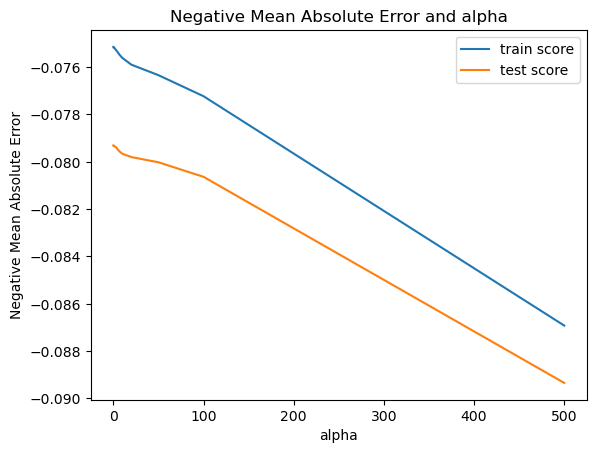

In [46]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [47]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=0.0001)

In [71]:
# check the coefficient values with lambda = 3

alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01776289,  0.0748589 ,  0.03610728,  0.01863658, -0.01807951,
        0.05521291,  0.11390923,  0.04150482, -0.0217254 , -0.03221626,
        0.01551144,  0.01402702,  0.01740453,  0.01922111,  0.01594281,
        0.01308703, -0.02084689,  0.01852644,  0.072017  ,  0.02635362,
        0.1108394 ,  0.08181645,  0.0216277 , -0.01328407,  0.02376462,
       -0.01925767,  0.01197992, -0.02522138, -0.04188212, -0.03019442,
        0.02862214,  0.03428786,  0.02017081,  0.01709556,  0.03872028,
        0.01207958,  0.00821718,  0.02782885,  0.01465169,  0.01443582])

In [49]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.01568481494990413

In [50]:
# Put the Features and coefficients in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0178
1,OverallQual,0.0749
2,OverallCond,0.0361
3,BsmtFinSF1,0.0186
4,BsmtUnfSF,-0.0181
5,TotalBsmtSF,0.0552
6,GrLivArea,0.1139
7,GarageCars,0.0415
8,IsRemodelled,-0.0217
9,BuiltOrRemodelAge,-0.0322


In [51]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0178,
 'OverallQual': 0.0749,
 'OverallCond': 0.0361,
 'BsmtFinSF1': 0.0186,
 'BsmtUnfSF': -0.0181,
 'TotalBsmtSF': 0.0552,
 'GrLivArea': 0.1139,
 'GarageCars': 0.0415,
 'IsRemodelled': -0.0217,
 'BuiltOrRemodelAge': -0.0322,
 'd_BsmtQual': 0.0155,
 'd_BsmtExposure': 0.014,
 'd_HeatingQC': 0.0174,
 'd_KitchenQual': 0.0192,
 'd_FireplaceQu': 0.0159,
 'd_GarageFinish': 0.0131,
 'd_BldgType': -0.0208,
 'd_SaleCondition': 0.0185,
 'MSZoning_FV': 0.072,
 'MSZoning_RH': 0.0264,
 'MSZoning_RL': 0.1108,
 'MSZoning_RM': 0.0818,
 'Neighborhood_Crawfor': 0.0216,
 'Neighborhood_MeadowV': -0.0133,
 'Neighborhood_NridgHt': 0.0238,
 'Neighborhood_OldTown': -0.0193,
 'Neighborhood_StoneBr': 0.012,
 'Exterior1st_CemntBd': -0.0252,
 'Exterior1st_VinylSd': -0.0419,
 'Exterior1st_Wd Sdng': -0.0302,
 'Exterior2nd_CmentBd': 0.0286,
 'Exterior2nd_VinylSd': 0.0343,
 'Exterior2nd_Wd Sdng': 0.0202,
 'Foundation_CBlock': 0.0171,
 'Foundation_PConc': 0.0387,
 'Foundation_Slab': 0.0121,
 'Foundation_

#### RFE

In [52]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [53]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
4,GrLivArea,True,1,0.1139
10,MSZoning_RL,True,1,0.1108
11,MSZoning_RM,True,1,0.0818
0,OverallQual,True,1,0.0749
8,MSZoning_FV,True,1,0.0720
3,TotalBsmtSF,True,1,0.0552
5,GarageCars,True,1,0.0415
14,Foundation_PConc,True,1,0.0387
1,OverallCond,True,1,0.0361
13,Exterior2nd_VinylSd,True,1,0.0343


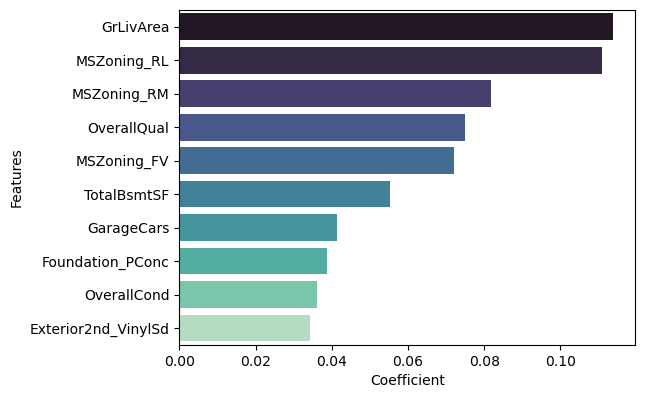

In [54]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='mako', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price 
of a house.    

#### Lasso

In [55]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.075194,-0.079392,1
1,0.0002,-0.075284,-0.079486,2
2,0.0003,-0.075399,-0.079602,3
3,0.0004,-0.075533,-0.079768,4
4,0.0005,-0.075685,-0.079905,5
5,0.001,-0.076448,-0.080638,6
6,0.002,-0.077222,-0.081056,7
7,0.003,-0.077579,-0.081184,8
8,0.004,-0.077980,-0.081376,9
9,0.005,-0.078442,-0.081804,10


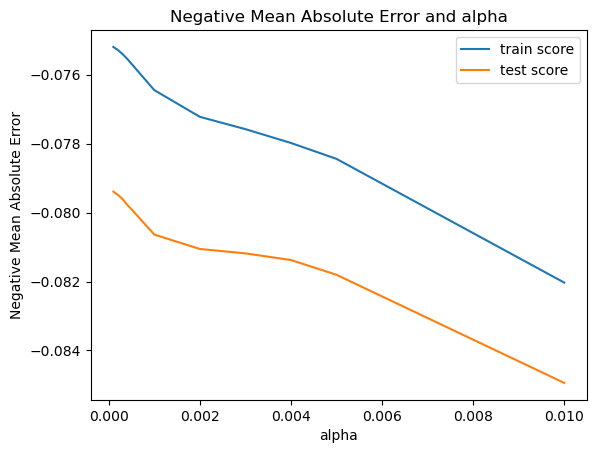

In [57]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [58]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [59]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.01780093,  0.07472104,  0.03579663,  0.01824529, -0.01829619,
        0.05539501,  0.11423749,  0.04199464, -0.02135319, -0.0320531 ,
        0.01538388,  0.01412688,  0.01731068,  0.01904607,  0.01565696,
        0.01336357, -0.0209754 ,  0.01797616,  0.07948541,  0.03001673,
        0.12548131,  0.09482665,  0.02150533, -0.01312368,  0.02388506,
       -0.01947198,  0.01201924, -0.02396543, -0.04307194, -0.03015085,
        0.02722284,  0.03530447,  0.02007466,  0.01739905,  0.03898736,
        0.01189717,  0.00917808,  0.02682903,  0.01405837,  0.01371955])

In [60]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.01564322926038436

In [61]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0178
1,OverallQual,0.0747
2,OverallCond,0.0358
3,BsmtFinSF1,0.0182
4,BsmtUnfSF,-0.0183
5,TotalBsmtSF,0.0554
6,GrLivArea,0.1142
7,GarageCars,0.0420
8,IsRemodelled,-0.0214
9,BuiltOrRemodelAge,-0.0321


In [62]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.01780092731694613,
 'OverallQual': 0.07472104487780365,
 'OverallCond': 0.03579663149800819,
 'BsmtFinSF1': 0.018245291495886707,
 'BsmtUnfSF': -0.018296190601793747,
 'TotalBsmtSF': 0.055395007712702754,
 'GrLivArea': 0.11423749397356642,
 'GarageCars': 0.04199464201040034,
 'IsRemodelled': -0.021353192740568277,
 'BuiltOrRemodelAge': -0.03205309953546848,
 'd_BsmtQual': 0.015383883832021506,
 'd_BsmtExposure': 0.014126882966424576,
 'd_HeatingQC': 0.017310677122886465,
 'd_KitchenQual': 0.01904606624242253,
 'd_FireplaceQu': 0.015656958090594485,
 'd_GarageFinish': 0.013363566729186352,
 'd_BldgType': -0.020975397178938242,
 'd_SaleCondition': 0.017976162871308595,
 'MSZoning_FV': 0.07948541070538735,
 'MSZoning_RH': 0.030016733473729563,
 'MSZoning_RL': 0.12548131461817236,
 'MSZoning_RM': 0.09482665450555401,
 'Neighborhood_Crawfor': 0.021505326412502135,
 'Neighborhood_MeadowV': -0.01312367773073205,
 'Neighborhood_NridgHt': 0.0238850563783946,
 'Neighborhood_OldTown

#### RFE

In [63]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [64]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.125481
4,GrLivArea,True,1,0.114237
11,MSZoning_RM,True,1,0.094827
8,MSZoning_FV,True,1,0.079485
0,OverallQual,True,1,0.074721
3,TotalBsmtSF,True,1,0.055395
5,GarageCars,True,1,0.041995
14,Foundation_PConc,True,1,0.038987
1,OverallCond,True,1,0.035797
13,Exterior2nd_VinylSd,True,1,0.035304


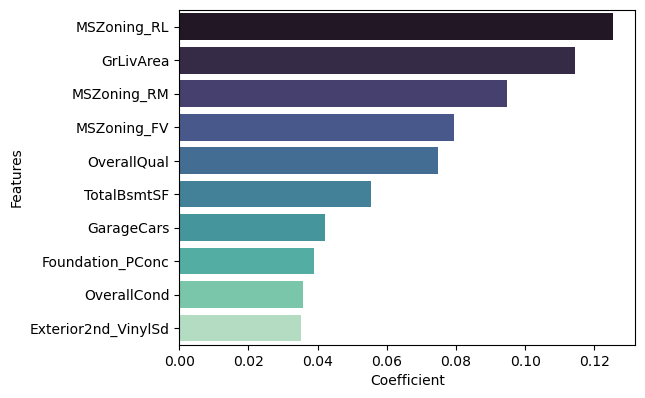

In [65]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='mako', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price 
of a house.  

## Conclusion :

- In Ridge regression, optiomal Lamda value and Mean squared error are as below:
    - Lambda - 3
    - Mean Squared error - 0.0157785</br> 
</br> 
- In Lasso regression, optiomal Lamda value and Mean squared error are as below:
    - Lambda - 0.0001
    - Mean Squared error - 0.0157360</br>
</br> 
- The Mean Squared Error term of Lasso is slightly lower than that of Ridge. Hence based on Lasso, the factors that generally affect the price are : 
    - Zoning classification
    - Living area
    - square feet
    - Overall quality 
    - Condition of the house
    - Foundation type of the house
    - Number of cars that can be accomodated in the garage
    - Total basement area in square feet
    - The Basement finished square feet area 